In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from numpy import argmax
from sklearn.cross_validation import train_test_split

C:\Users\AbdurRehman\Miniconda3\envs\nnseries\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
df_BD2 = pd.read_csv('BD2test.txt', header=None)
df_BD2 = pd.DataFrame(df_BD2[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_BD2.columns = features
df_BD2.insert(128, 'Class', '1')
df_BD2.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,32920.0,216.7,13404.6,199.2,113.6,54.5,521.5,32.9,48.1,114.5,...,71.2,23.5,38.9,16.4,49.8,50.2,9.2,62.0,7.6\r\r\n,1
1,33020.0,154.2,13353.2,219.0,93.0,141.1,495.2,24.4,22.4,119.0,...,84.6,35.3,74.1,20.2,54.7,54.7,27.4,45.3,24.9\r\r\n,1
2,33087.0,164.0,13368.3,252.1,174.4,113.1,447.3,52.0,91.0,86.3,...,106.8,25.3,71.2,25.9,46.9,19.3,49.9,61.5,39.5\r\r\n,1
3,33152.0,133.4,13415.8,227.4,114.1,118.4,429.5,81.1,65.1,119.1,...,72.7,23.3,39.4,8.0,49.8,49.4,49.0,70.5,5.2\r\r\n,1
4,33146.0,139.6,13388.7,241.3,229.5,120.6,417.0,108.5,133.7,54.5,...,83.4,46.6,21.5,64.2,3.7,45.1,12.2,43.6,13.6\r\r\n,1


In [12]:
df_LHB = pd.read_csv('LHBtest.txt', header=None)
df_LHB = pd.DataFrame(df_LHB[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_LHB.columns = features
df_LHB.insert(128, 'Class','2')
df_LHB.tail()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
15,33016.0,179.8,13006.6,147.9,83.2,60.6,489.3,31.3,131.1,74.5,...,61.6,98.4,55.9,122.1,15.7,8.0,11.0,1557.0,4.6\r\r\n,2
16,33063.0,133.9,12995.3,154.4,53.0,102.5,340.4,70.0,115.1,57.4,...,None,None,None,None,None,None,None,None,None,2
17,33026.0,178.7,12984.8,76.9,56.2,42.0,429.9,26.4,101.7,75.3,...,11.6,23.3,8.4,83.0,29.6,16.2,23.5,1493.0,32.9\r\r\n,2
18,32994.0,150.1,12933.5,81.0,22.1,26.1,410.8,48.0,121.5,61.8,...,51.8,100.5,55.5,43.4,25.0,20.0,61.0,1495.3,90.8\r\r\n,2
19,32988.0,133.4,12959.3,104.5,53.4,51.3,449.1,47.4,162.5,50.8,...,22.5,144.9,81.7,61.8,29.2,16.3,53.2,1521.7,83.1\r\r\n,2


In [13]:
df_ULTIMATE = df_BD2.append(df_LHB, ignore_index=True)
df_ULTIMATE.tail()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
35,33016.0,179.8,13006.6,147.9,83.2,60.6,489.3,31.3,131.1,74.5,...,61.6,98.4,55.9,122.1,15.7,8.0,11.0,1557.0,4.6\r\r\n,2
36,33063.0,133.9,12995.3,154.4,53.0,102.5,340.4,70.0,115.1,57.4,...,None,None,None,None,None,None,None,None,None,2
37,33026.0,178.7,12984.8,76.9,56.2,42.0,429.9,26.4,101.7,75.3,...,11.6,23.3,8.4,83.0,29.6,16.2,23.5,1493.0,32.9\r\r\n,2
38,32994.0,150.1,12933.5,81.0,22.1,26.1,410.8,48.0,121.5,61.8,...,51.8,100.5,55.5,43.4,25.0,20.0,61.0,1495.3,90.8\r\r\n,2
39,32988.0,133.4,12959.3,104.5,53.4,51.3,449.1,47.4,162.5,50.8,...,22.5,144.9,81.7,61.8,29.2,16.3,53.2,1521.7,83.1\r\r\n,2


In [18]:
df_ULTIMATE.i63 = df_ULTIMATE.i63.str.replace('\r\r\n','')
print(df_ULTIMATE)

         v0     v1       v2     v3     v4     v5     v6     v7     v8     v9  \
0   32920.0  216.7  13404.6  199.2  113.6   54.5  521.5   32.9   48.1  114.5   
1   33020.0  154.2  13353.2  219.0   93.0  141.1  495.2   24.4   22.4  119.0   
2   33087.0  164.0  13368.3  252.1  174.4  113.1  447.3   52.0   91.0   86.3   
3   33152.0  133.4  13415.8  227.4  114.1  118.4  429.5   81.1   65.1  119.1   
4   33146.0  139.6  13388.7  241.3  229.5  120.6  417.0  108.5  133.7   54.5   
5   33089.0  154.8  13331.4  266.9  153.5  135.6  390.5  109.6  107.8  142.5   
6   33099.0  158.0  13439.8  255.3  189.4   87.6  448.0   73.9   71.8  123.1   
7   33129.0  146.1  13409.1  257.1  200.6   89.5  406.5   69.5   93.4  107.8   
8   33185.0  181.1  13368.8  204.3  117.7   94.6  382.5   91.5   88.9   27.6   
9   33224.0  138.4  13391.1  234.2  145.3   31.5  345.3   78.1  104.6   60.6   
10  33183.0  140.7  13330.8  248.3  179.7   78.4  361.1  116.2   61.3  168.3   
11  33271.0  184.5  13374.3  239.2  135.

In [35]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_ULTIMATE)

,level_0,index,v0,v1,v2,v3,v4,v5,v6,v7,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,0.0,0.0,32920.0,216.7,13404.6,199.2,113.6,54.5,521.5,32.9,...,71.2,23.5,38.9,16.4,49.8,50.2,9.2,62.0,7.6,1.0
1,1.0,1.0,33020.0,154.2,13353.2,219.0,93.0,141.1,495.2,24.4,...,84.6,35.3,74.1,20.2,54.7,54.7,27.4,45.3,24.9,1.0
2,2.0,2.0,33087.0,164.0,13368.3,252.1,174.4,113.1,447.3,52.0,...,106.8,25.3,71.2,25.9,46.9,19.3,49.9,61.5,39.5,1.0
3,3.0,3.0,33152.0,133.4,13415.8,227.4,114.1,118.4,429.5,81.1,...,72.7,23.3,39.4,8.0,49.8,49.4,49.0,70.5,5.2,1.0
4,4.0,4.0,33146.0,139.6,13388.7,241.3,229.5,120.6,417.0,108.5,...,83.4,46.6,21.5,64.2,3.7,45.1,12.2,43.6,13.6,1.0
5,5.0,5.0,33089.0,154.8,13331.4,266.9,153.5,135.6,390.5,109.6,...,56.7,17.2,55.6,63.0,42.6,42.9,57.0,16.4,21.3,1.0
6,6.0,6.0,33099.0,158.0,13439.8,255.3,189.4,87.6,448.0,73.9,...,96.2,27.7,48.6,19.9,46.4,41.4,9.8,42.6,26.0,1.0
7,7.0,7.0,33129.0,146.1,13409.1,257.1,200.6,89.5,406.5,69.5,...,88.9,5.6,30.1,27.5,36.4,52.9,32.5,51.3,22.3,1.0
8,8.0,8.0,33185.0,181.1,13368.8,204.3,117.7,94.6,382.5,91.5,...,136.0,13.9,68.4,39.9,24.0,13.9,15.7,7.8,20.1,1.0
9,9.0,9.0,33224.0,138.4,13391.1,234.2,145.3,31.5,345.3,78.1,...,86.8,53.4,41.0,23.2,57.5,49.2,24.6,56.4,21.1,1.0


In [57]:
#Making dataset for neural network
dataset = df_ULTIMATE.values
X = dataset[:,2:130]
y = dataset[:,130]

In [63]:
X = np.asmatrix(X).astype(np.float)
y = np.asmatrix(y).astype(np.float)
y = y.transpose()

In [64]:
#Scaling our data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(X)

In [65]:
#One hot encoding
encoded_Y = to_categorical(y)
inverted = argmax(encoded_Y[0])

In [66]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#20% of the dataset stored as cross-validation set
X_train, X_val, y_train, y_val = train_test_split(scaled_X, encoded_Y, test_size=0.2, random_state=1)
#20% of the dataset stored as test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_Y, test_size=0.2, random_state=1)

In [69]:
#Creating NN model
model = Sequential()
model.add(Dense(20, input_dim=128, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation = 'sigmoid'))

#Compiling NN model
model.compile(Adam(lr = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [70]:
#Training the NN model
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, verbose=1)

Train on 29 samples, validate on 8 samples
Epoch 1/50
29/29 [==============================] - 3s 99ms/step - loss: 0.6367 - acc: 0.7011 - val_loss: 0.6302 - val_acc: 0.5000
Epoch 2/50
29/29 [==============================] - 0s 344us/step - loss: 0.5629 - acc: 0.7471 - val_loss: 0.5751 - val_acc: 0.6250
Epoch 3/50
29/29 [==============================] - 0s 535us/step - loss: 0.5101 - acc: 0.8506 - val_loss: 0.4902 - val_acc: 0.9167
Epoch 4/50
29/29 [==============================] - 0s 276us/step - loss: 0.4500 - acc: 0.9540 - val_loss: 0.4142 - val_acc: 1.0000
Epoch 5/50
29/29 [==============================] - 0s 207us/step - loss: 0.3872 - acc: 0.9770 - val_loss: 0.3541 - val_acc: 1.0000
Epoch 6/50
29/29 [==============================] - 0s 448us/step - loss: 0.3244 - acc: 1.0000 - val_loss: 0.3050 - val_acc: 1.0000
Epoch 7/50
29/29 [==============================] - 0s 276us/step - loss: 0.2615 - acc: 1.0000 - val_loss: 0.2548 - val_acc: 1.0000
Epoch 8/50
29/29 [================

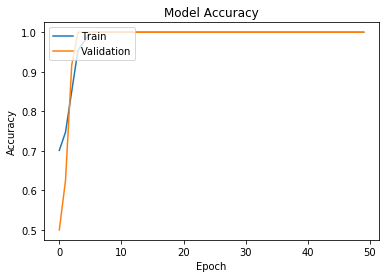

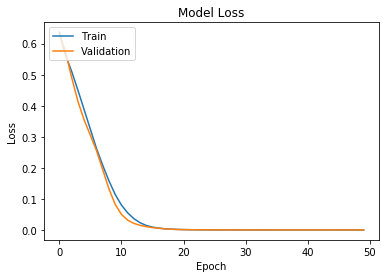

In [71]:
#Let's plot accuracy and loss over time on both our train and validation sets

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [72]:
#Evaluate model on the test set
model.evaluate(X_test, y_test, verbose=1)

8/8 [==============================] - 0s 875us/step


[3.146720473523601e-06, 1.0]

In [83]:
# new instance where we do not know the answer
Xnew = np.array([[33323.0,325.9,12855.8,247.9,104.2,75.1,365.6,154.3,90.3,134.9,246.9,98.8,51.4,61.6,28.2,141.6,140.2,206.6,76.2,178.4,119.7,204.7,106.7,205.9,355.7,46.9,203.3,50.6,79.9,46.1,31.6,80.5,13.0,80.5,31.6,46.1,79.9,50.6,203.3,46.9,355.7,205.9,106.7,204.7,119.7,178.4,76.2,206.6,140.2,141.6,28.2,61.6,51.4,98.8,246.9,134.9,90.3,154.3,365.6,75.1,104.2,247.9,12855.8,325.9,33361.0,94.0,2453.1,123.1,45.9,77.5,70.5,70.2,59.4,79.0,110.5,38.3,30.5,44.3,69.4,74.3,148.4,91.2,28.3,148.7,75.0,178.6,59.4,151.8,389.0,41.5,140.1,55.1,45.8,24.7,30.8,54.5,33.0,54.5,30.8,24.7,45.8,55.1,140.1,41.5,389.0,151.8,59.4,178.6,75.0,148.7,28.3,91.2,148.4,74.3,69.4,44.3,30.5,38.3,110.5,79.0,59.4,70.2,70.5,77.5,45.9,123.1,2453.1,94.0]])
#scaler.transform uses the same parameters you used to scale training data, and scales the new incoming data
scaled_Xnew = scaler.transform(Xnew)
# make a prediction
ynew = model.predict_classes(scaled_Xnew)
# show the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted=%s" % (ynew[0]))

Predicted=1
